## Retinal Disease Classification using Deep Learning 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing import image

In [2]:
#setting standard image size
img_width = 300
img_height = 450

### Exploratory Data Analysis (EDA)

#### For Training

In [3]:
#Loading the training data
df_train = pd.read_csv('/kaggle/input/retinal-disease-classification/Training_Set/Training_Set/RFMiD_Training_Labels.csv')

#ID and Disease_Risk column are not to be trained. So we drop them from the dataframe.
df_train = df_train.drop(['ID', 'Disease_Risk'], axis=1)

In [4]:
#defining function to check the count of diseases
def check_diseases(df):
    disease_name, zero_count, one_count = [], [], []
    rLen = len(df)
    pd.DataFrame.iteritems = pd.DataFrame.items
    for (col_name, col) in df.iteritems():
        disease_name.append(col_name)
        zero_count.append(df[col_name].value_counts()[0])
    one_count = [rLen - x for x in zero_count]
    return disease_name, zero_count, one_count

#Insert Image ID
def imageID(df, num):
    id_list = []
    for i in range(num):
        id_list.append(i+1)
    df.insert(0, 'ID', id_list)

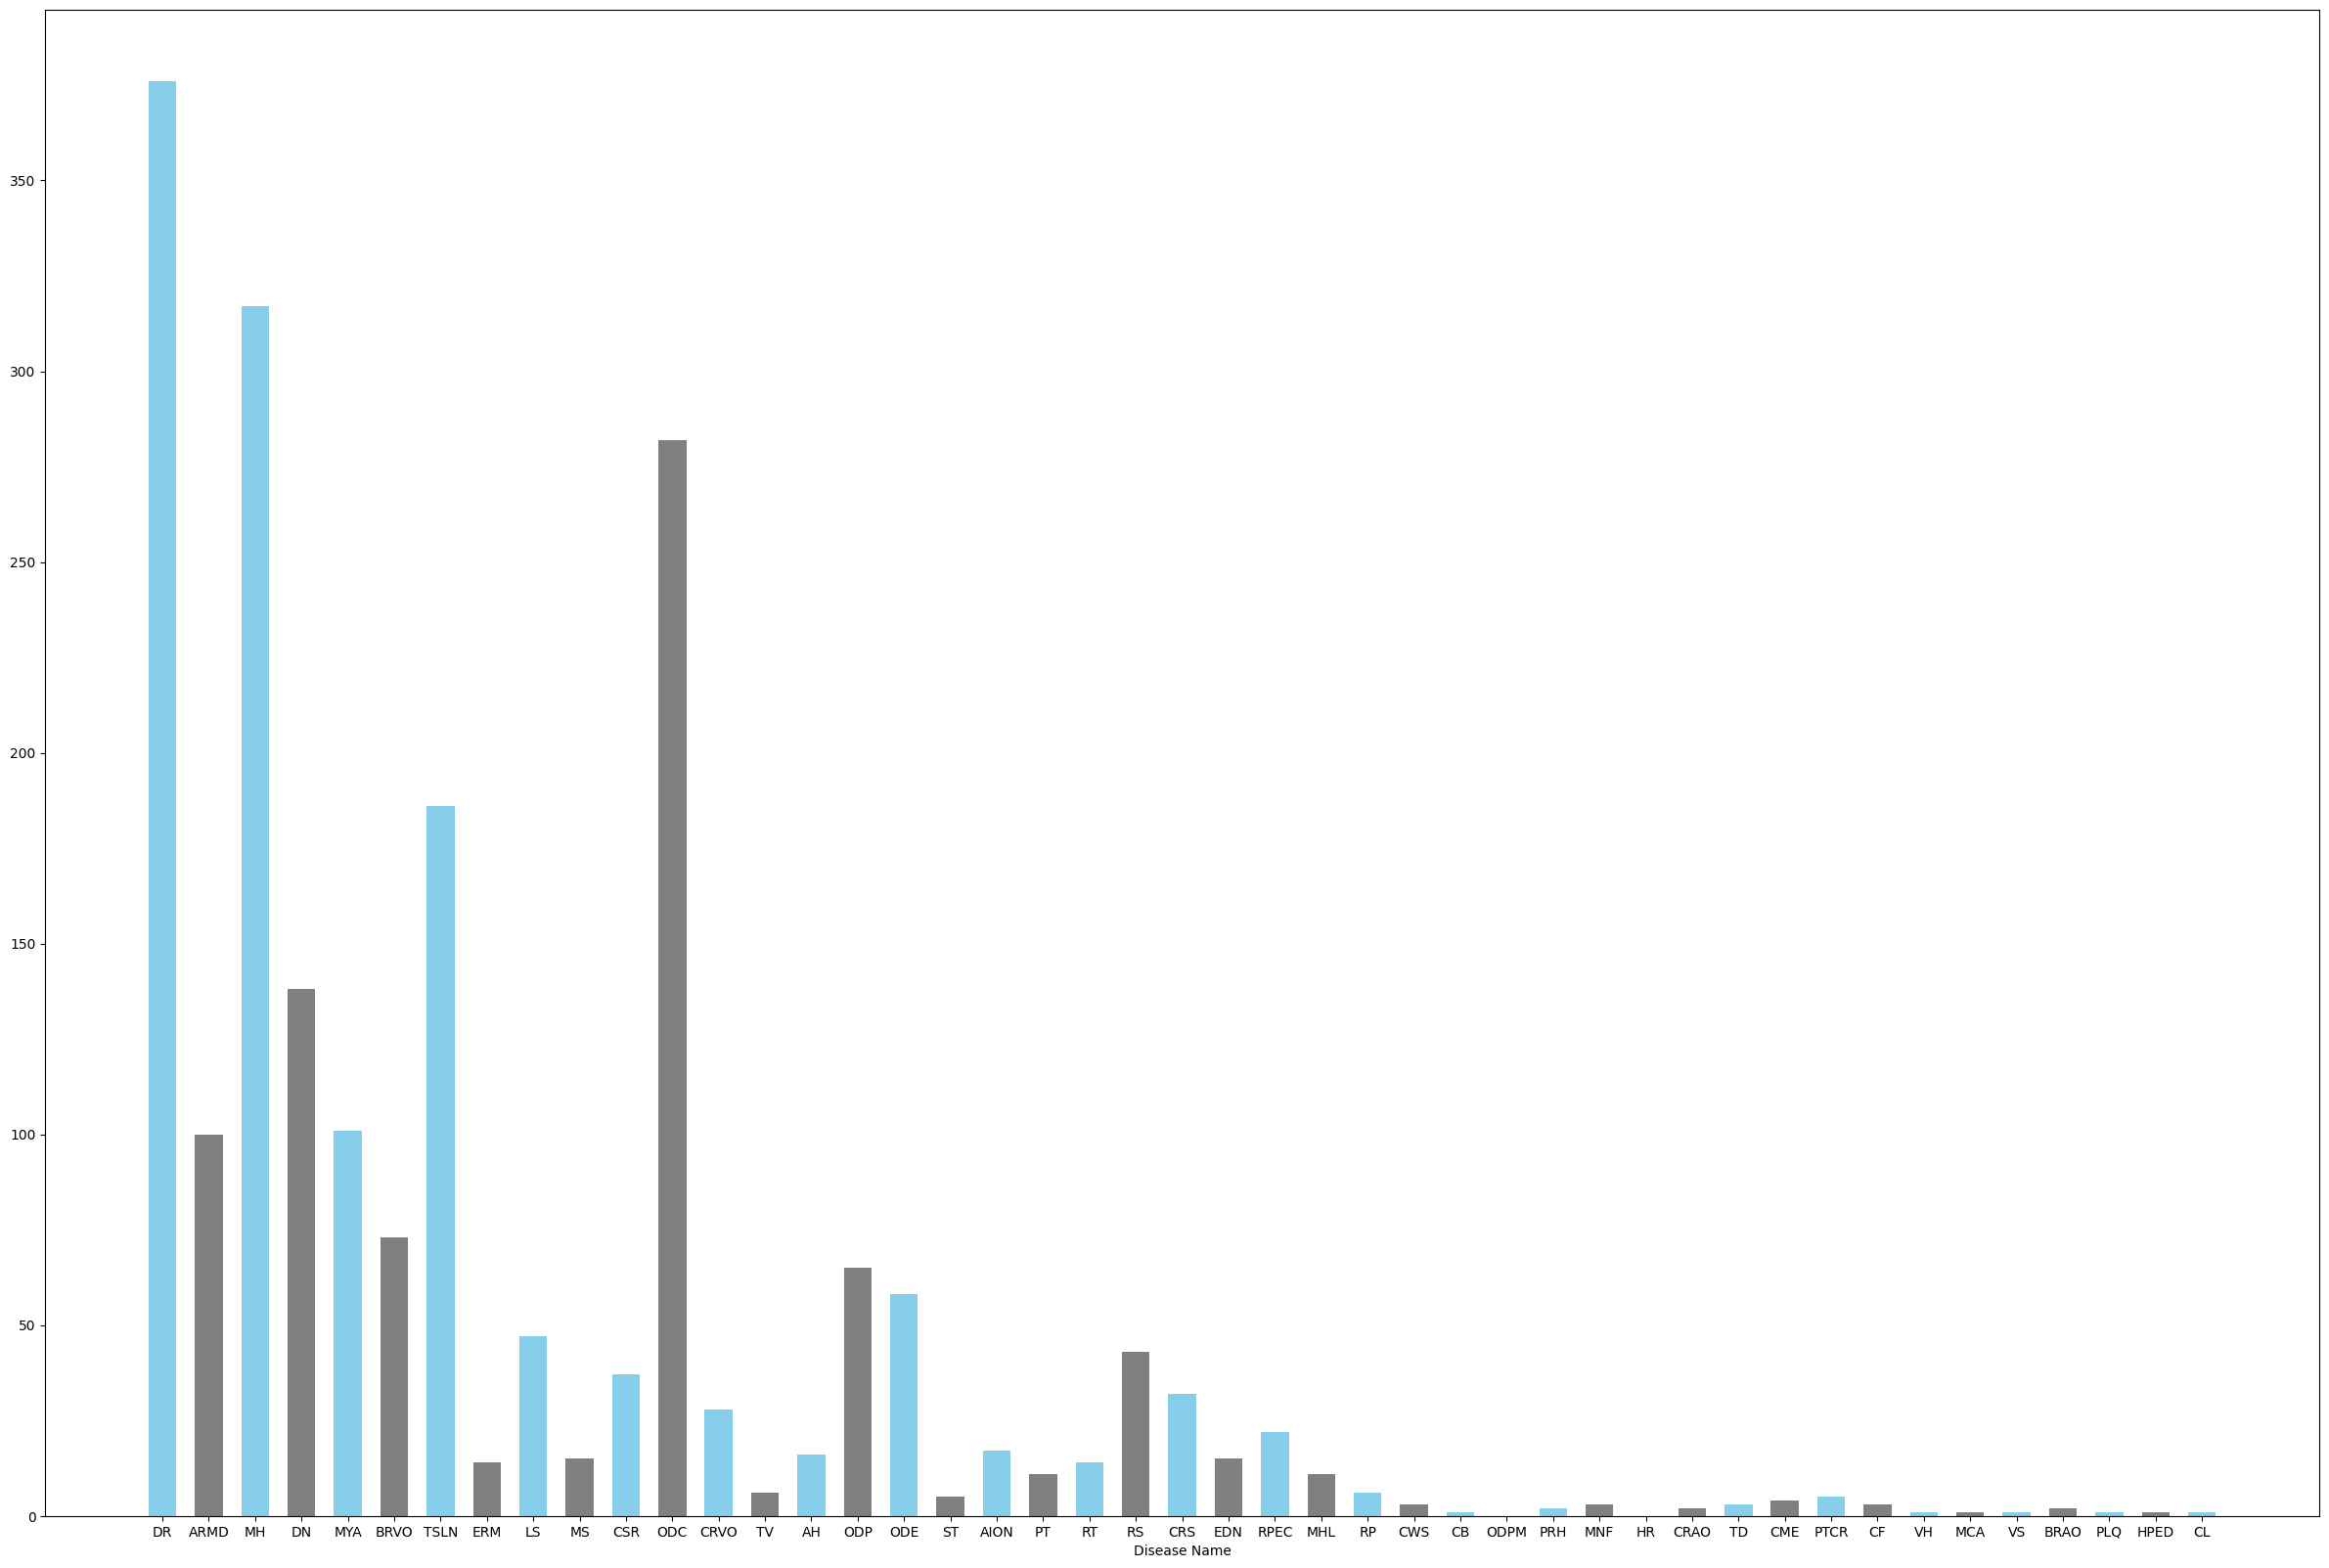

In [5]:
#visualizing the features 
disease_name, zCount, oCount = check_diseases(df_train)

figure = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [6]:
# Drops the columns which are below the 60
for i in range(45):
    if oCount[i] <= 60:
        df_train = df_train.drop([disease_name[i]], axis=1)

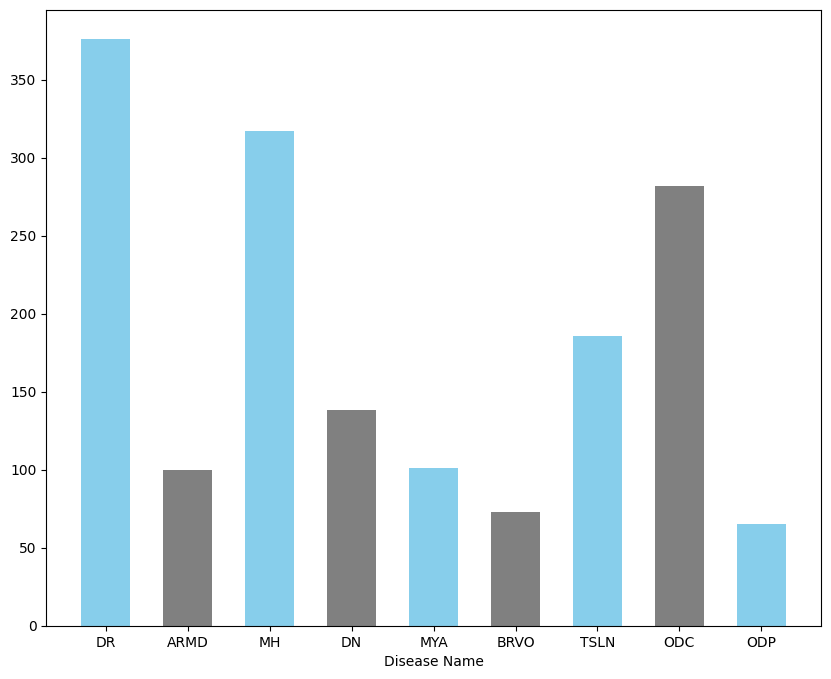

DR appear: 376
ARMD appear: 100
MH appear: 317
DN appear: 138
MYA appear: 101
BRVO appear: 73
TSLN appear: 186
ODC appear: 282
ODP appear: 65


In [7]:
#visualizing the data after dropping columns
disease_name, zeroCount, oneCount = check_diseases(df_train)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
imageID(df_train,len(df_train))

In [8]:
#loading the images
X_dataset = []  
print(tqdm(range(df_train.shape[0])))
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img('/kaggle/input/retinal-disease-classification/Training_Set/Training_Set/Training/' +str(df_train['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|          | 0/1920 [00:00<?, ?it/s]


  0%|          | 0/1920 [00:00<?, ?it/s]


100%|██████████| 1920/1920 [04:18<00:00,  7.44it/s]


In [9]:
X_train = np.array(X_dataset)

#ID column is not to be trained. So drop it from the dataframe.
Y_train = np.array(df_train.drop(['ID'], axis=1))

#### For Testing

In [10]:
#Loading the training data
df_test = pd.read_csv('/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')

#ID and Disease_Risk column are not to be trained. So we drop them from the dataframe.
df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)

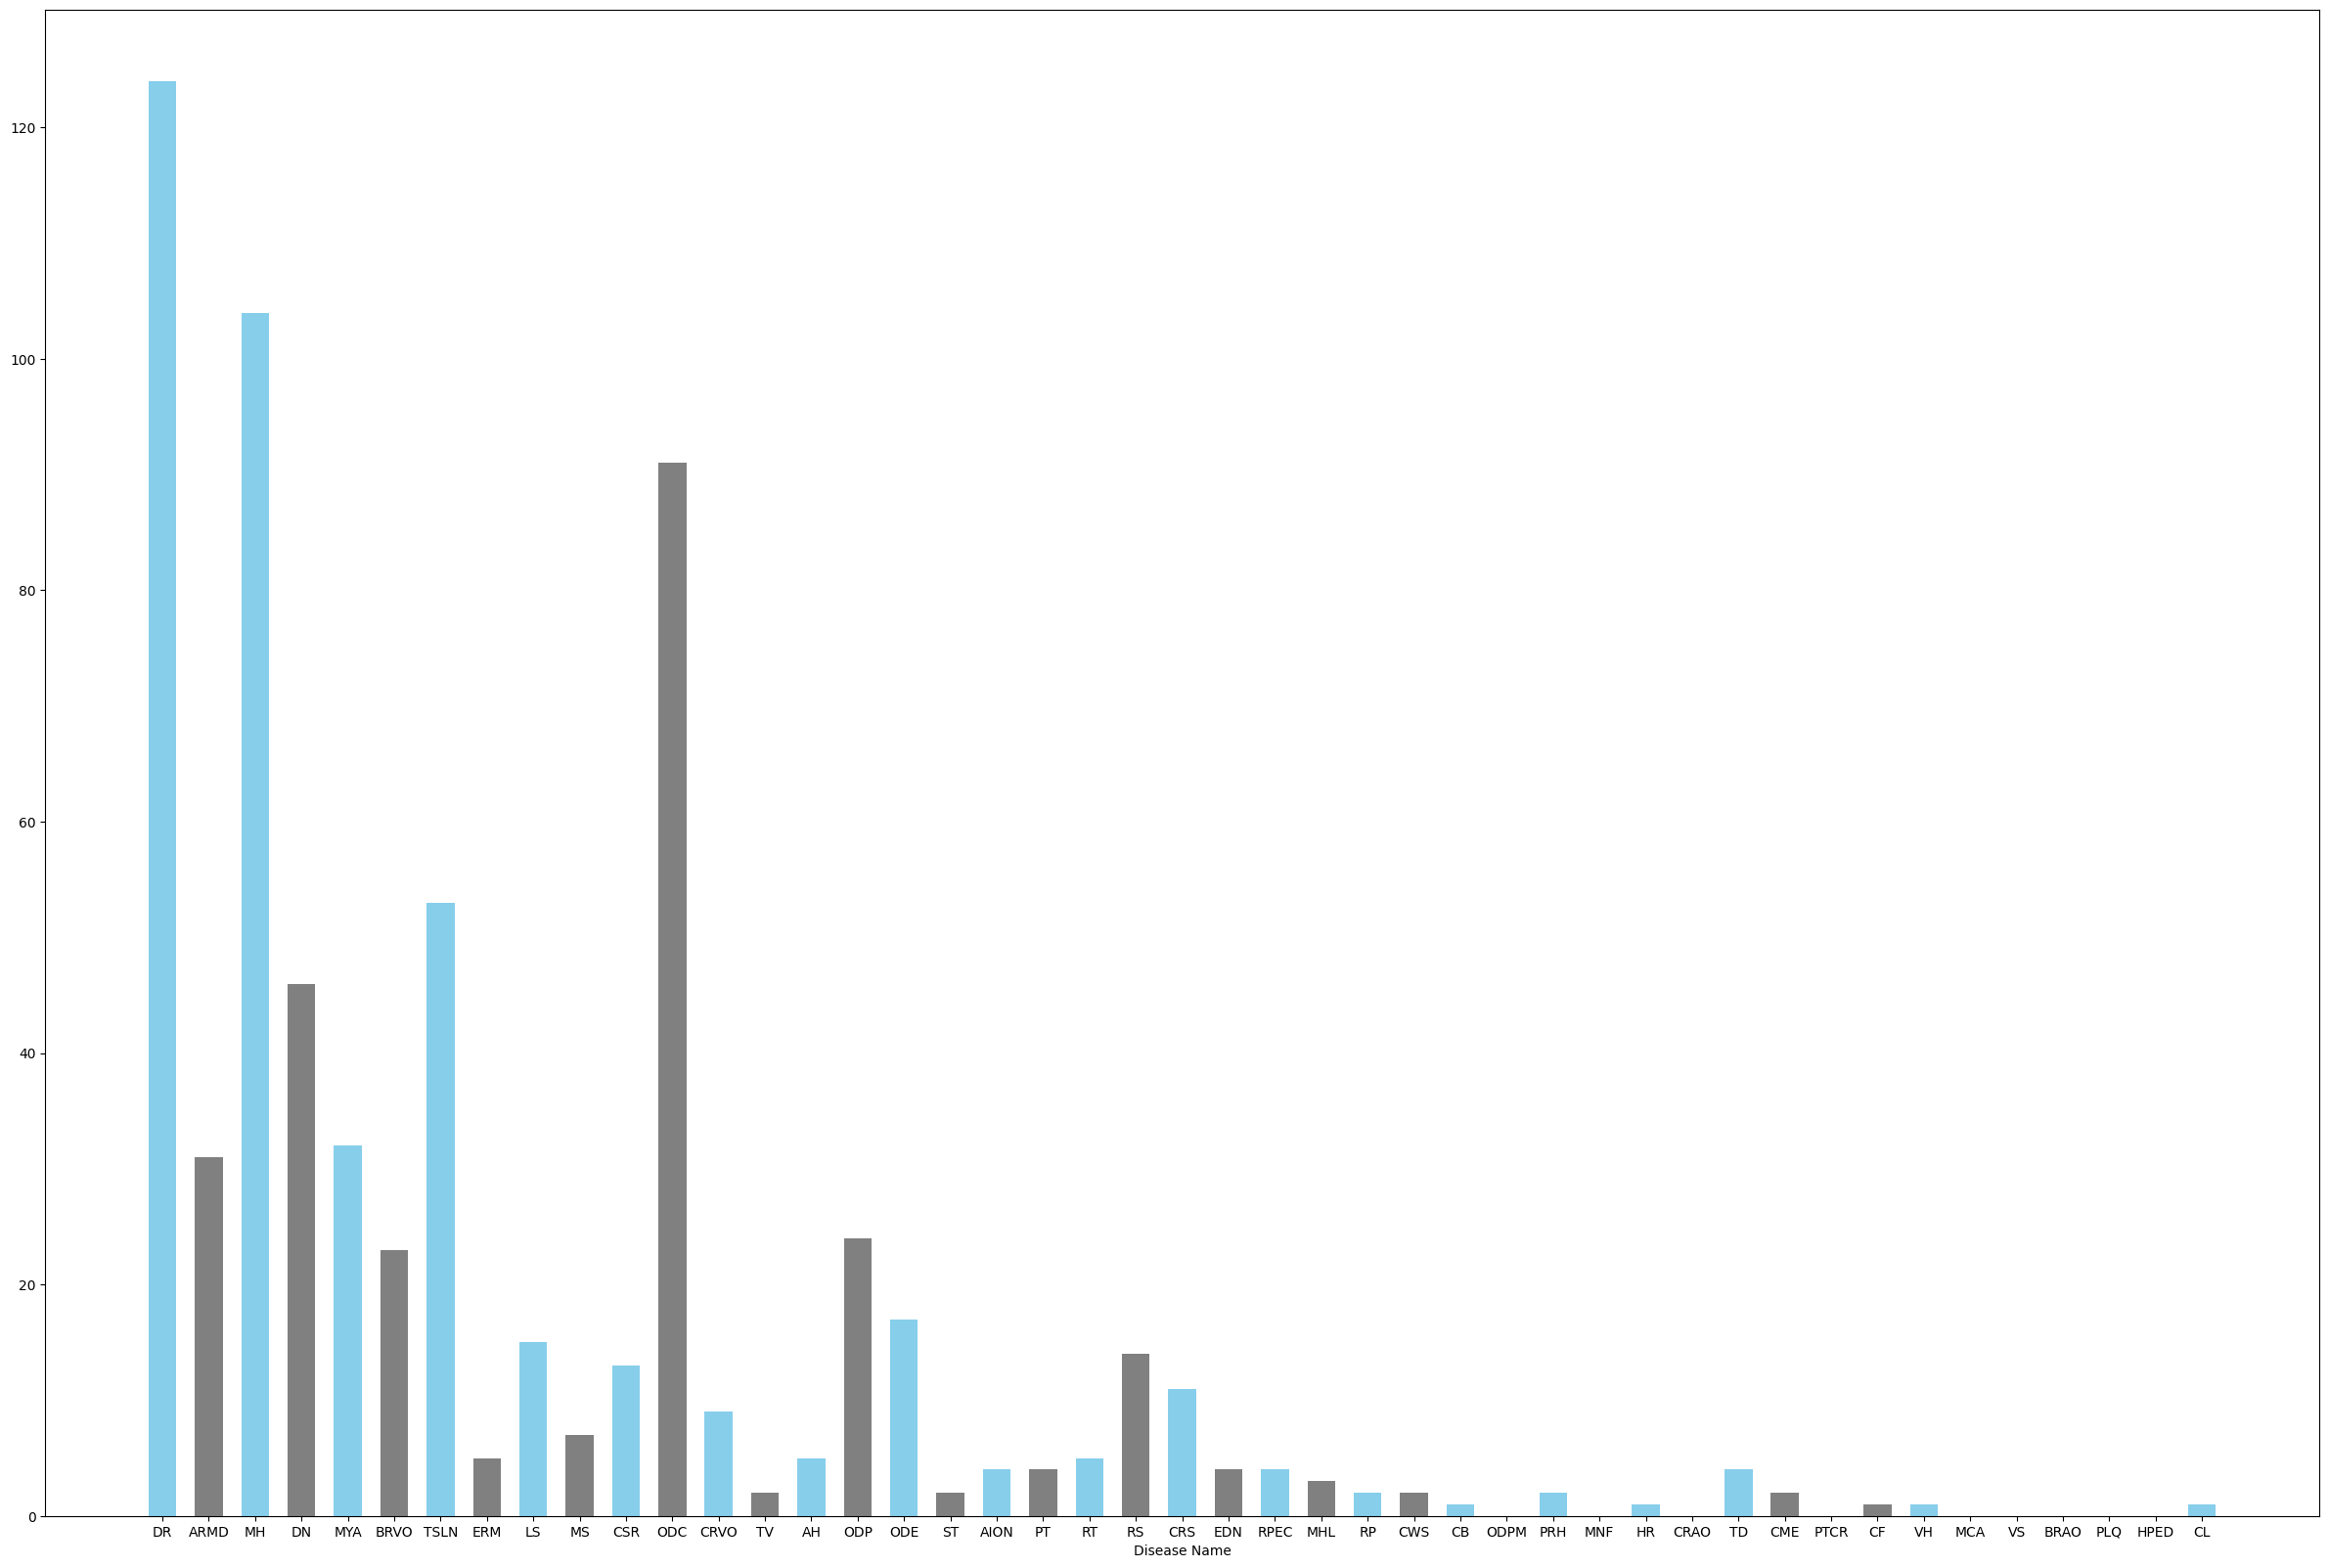

In [11]:
disease_name, zeroCount, oneCount = check_diseases(df_test)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [12]:
# Drops the columns which are below the 20
for i in range(45):
    if oneCount[i] <= 20:
        df_test = df_test.drop([disease_name[i]], axis=1)

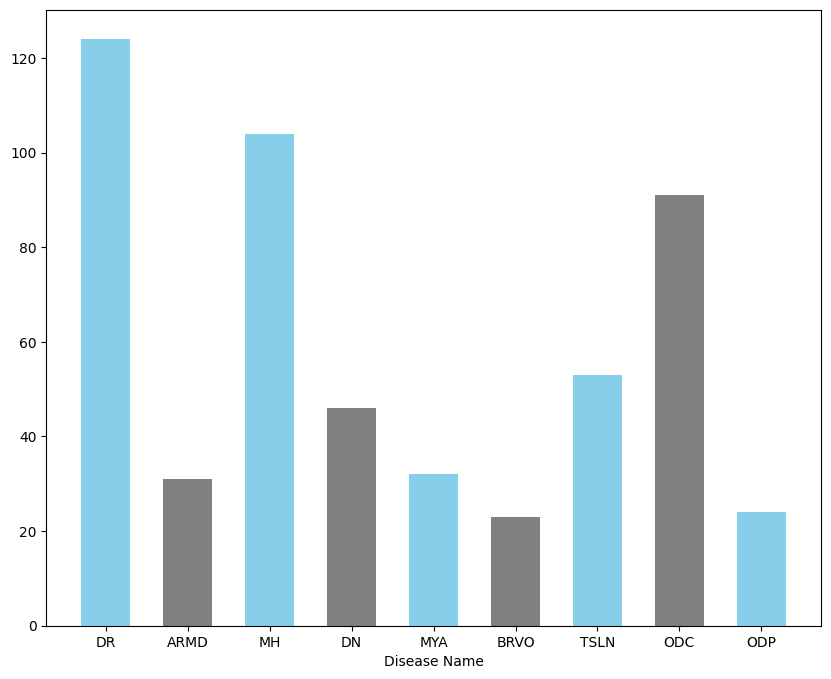

DR appear: 124
ARMD appear: 31
MH appear: 104
DN appear: 46
MYA appear: 32
BRVO appear: 23
TSLN appear: 53
ODC appear: 91
ODP appear: 24


In [13]:
disease_name, zeroCount, oneCount = check_diseases(df_test)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
imageID(df_test,len(df_test))

In [14]:
X_dataset = []  
print(tqdm(range(df_test.shape[0])))
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/Test/' +str(df_test['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|          | 0/640 [00:00<?, ?it/s]


  0%|          | 0/640 [00:00<?, ?it/s]


100%|██████████| 640/640 [01:29<00:00,  7.11it/s]


In [15]:
X_test = np.array(X_dataset)

#ID column is not to be trained. So drop it from the dataframe.
Y_test = np.array(df_test.drop(['ID'], axis=1))

### Deep Learning model

In [16]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='sigmoid'))

#we always use Sigmoid for multilabel classification as softmax is useful for mutually exclusive classes.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 450, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 300, 450, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 225, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 225, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 112, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 112, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 112, 64)         │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 56, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32256)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,128,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,306,217 (16.43 MB)

 Trainable params: 4,305,865 (16.43 MB)

 Non-trainable params: 352 (1.38 KB)

In [18]:
#Binary cross entropy of each label 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
result = model.fit(X_train, Y_train, epochs=550, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 344ms/step - accuracy: 0.1785 - loss: 1.0621 - val_accuracy: 0.1219 - val_loss: 0.4991
Epoch 2/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.3665 - loss: 0.3017 - val_accuracy: 0.5797 - val_loss: 0.3254
Epoch 3/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.3625 - loss: 0.2794 - val_accuracy: 0.5750 - val_loss: 0.2880
Epoch 4/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.4559 - loss: 0.2738 - val_accuracy: 0.1344 - val_loss: 0.2943
Epoch 5/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.4021 - loss: 0.2652 - val_accuracy: 0.1453 - val_loss: 0.2937
Epoch 6/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.3912 - loss: 0.2583 - val_accuracy: 0.2656 - val_loss: 0.2837
Epoch 7/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.4102 - loss: 0.2467 - val_accuracy: 0.1688 - val_loss: 0.2952
Epoch 8/550
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.4182 - loss: 0.2451 - val_acc

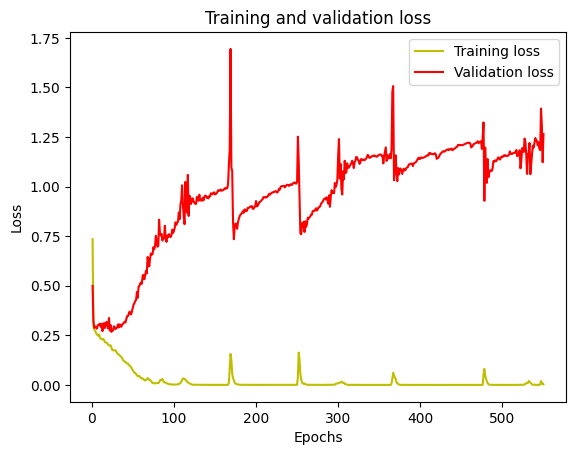

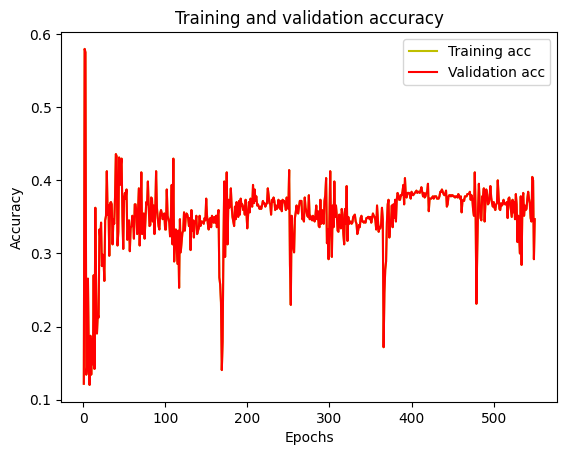

In [22]:
#plot the training and validation accuracy and loss at each epoch
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = result.history['val_accuracy']
val_acc = result.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
DR (1.0)
MH (0.00328)
DN (4.46e-09)
TSLN (1.98e-10)
ODC (4.07e-11)


IndexError: index 5 is out of bounds for axis 0 with size 5

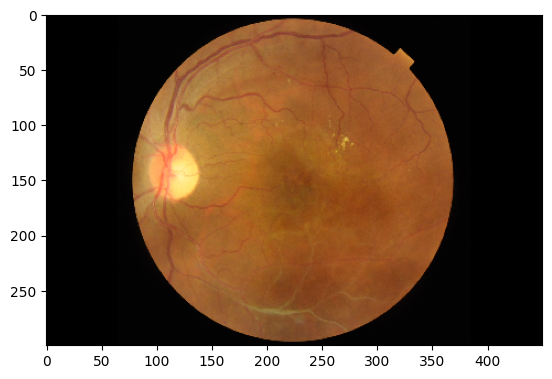

In [25]:
#Validate on an image
img = image.load_img('/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/Test/2.png', target_size=(img_width,img_height,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)
classes = np.array(disease_name)
proba = model.predict(img)  #Get probabilities for each class

sorted_categories = np.argsort(proba[0])[:-6:-1]

#Print classes and corresponding probabilities
for i in range(len(classes)):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


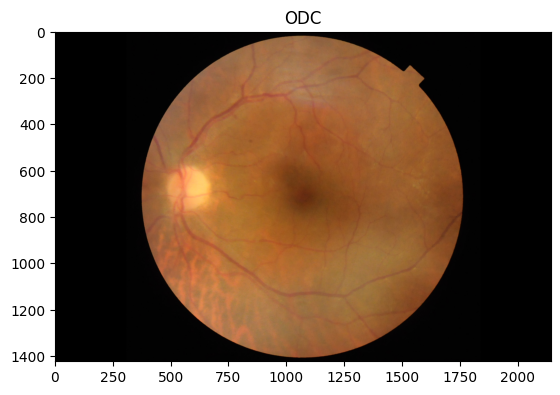

In [26]:
#validation of another image
from PIL import Image

new_path = '/kaggle/input/retinal-disease-classification/Test_Set/Test_Set/Test/229.png'
image_result=Image.open(new_path)


def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width, img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res


img = data_resizing_process(new_path)
result = model.predict(img)
# print(np.argmax(result))

Categories=disease_name
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [27]:
_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3541 - loss: 1.3371
Accuracy =  34.687501192092896 %
